In [18]:
from utils import Result, results_path, load_base_model, frequencies_to_periods

use_attenuation = True
use_anelasticity = False
path = results_path.joinpath("f018-876f-a9e0-2f46")
sub_path = path.joinpath("runs").joinpath("anelasticity_" + str(use_anelasticity) + "__attenuation_" + str(use_attenuation))
anelastic_Love_numbers = Result()
anelastic_Love_numbers.load(name="anelastic_Love_numbers", path=sub_path)
omega_values = load_base_model(name="frequencies", path=sub_path)
T_values = frequencies_to_periods(frequencies=omega_values)
elastic_Love_numbers = Result()
elastic_Love_numbers.load(name="elastic_Love_numbers", path=path)
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
degrees_to_plot = [2, 3, 4, 5, 6]
degrees_indices = [degrees.index(degree) for degree in degrees_to_plot]
T = frequencies_to_periods(omega_values)

Text(0, 0.5, '$ h_n(T) / h_n^E$')

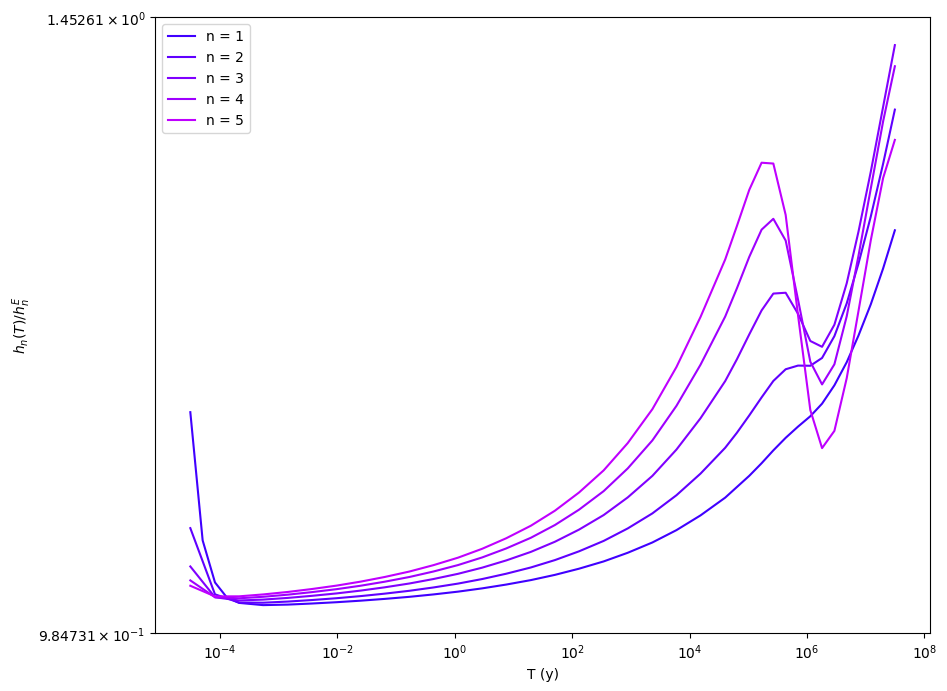

In [20]:
import matplotlib.pyplot as plt
from utils import Direction, BoundaryCondition
from numpy import real

plt.figure(figsize=(10, 8))
for i_degree, degree in zip(degrees_indices, degrees):
    color = ((i_degree + 1.0) / 8.0, 0.0, 1.0)
    elastic_value = real(elastic_Love_numbers.values[Direction.radial][BoundaryCondition.load][i_degree][0])
    anelastic_values = real(anelastic_Love_numbers.values[Direction.radial][BoundaryCondition.load][i_degree])
    h_ratio = anelastic_values / elastic_value
    plt.plot(T, h_ratio, label="n = " + str(degree), color=color)
    plt.xscale("log")
    plt.yscale("symlog")
    plt.legend()
plt.xlabel("T (y)")
plt.ylabel("$ h_n(T) / h_n^E$")
